In [ ]:
from pandas import read_csv, DataFrame, Series
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from dslabs_functions import series_train_test_split, HEIGHT

filename: str = "/home/mina/Documents/portugal/dataScience/set_1_diff_twice.csv"
file_tag: str = "Set 1"
target: str = "Manhattan"
timecol: str = "Date"
measure: str = "RMSE"

# filename: str = "/home/mina/Documents/portugal/dataScience/set_2_diff_twice.csv"
# file_tag: str = "Set 2"
# target: str = "GDP"
# timecol: str = "Year"
# measure: str = "RMSE"
#RMSE, MAPE, R2 et MAE 

data: DataFrame = read_csv(filename, index_col=timecol, sep=",", decimal=".", parse_dates=True)
series: Series = data[target]
train, test = series_train_test_split(data, trn_pct=0.90)

In [37]:
from dslabs_functions import FORECAST_MEASURES, DELTA_IMPROVE, plot_line_chart


def exponential_smoothing_study(train: Series, test: Series, measure: str = "R2"):
    alpha_values = [i / 10 for i in range(1, 10)]
    flag = measure == "R2" or measure == "MAPE"
    best_model = None
    best_params: dict = {"name": "Exponential Smoothing", "metric": measure, "params": ()}
    best_performance: float = -100000

    yvalues = []
    for alpha in alpha_values:
        tool = SimpleExpSmoothing(train)
        model = tool.fit(smoothing_level=alpha, optimized=False)
        prd_tst = model.forecast(steps=len(test))

        eval: float = FORECAST_MEASURES[measure](test, prd_tst)
        # print(w, eval)
        if eval > best_performance and abs(eval - best_performance) > DELTA_IMPROVE:
            best_performance: float = eval
            best_params["params"] = (alpha,)
            best_model = model
        yvalues.append(eval)

    print(f"Exponential Smoothing best with alpha={best_params['params'][0]:.0f} -> {measure}={best_performance}")
    plot_line_chart(
        alpha_values,
        yvalues,
        title=f"Exponential Smoothing ({measure})",
        xlabel="alpha",
        ylabel=measure,
        percentage=flag,
    )

    return best_model, best_params


In [38]:
from matplotlib.pyplot import savefig

best_model, best_params = exponential_smoothing_study(train, test, measure=measure)
savefig(f"/home/mina/Documents/portugal/dataScience/Data_science_project/MODELS’ EVALUATION/images_exponential/{file_tag}_exponential_smoothing_{measure}_study.png")

/home/mina/.local/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


KeyError: 'RMSE'

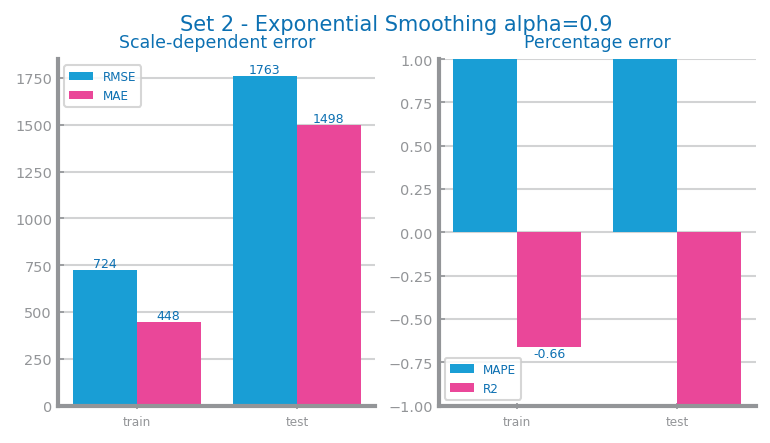

In [31]:
from dslabs_functions import plot_forecasting_eval

params = best_params["params"]
prd_trn = best_model.predict(start=0, end=len(train) - 1)
prd_tst = best_model.forecast(steps=len(test))

plot_forecasting_eval(train, test, prd_trn, prd_tst, title=f"{file_tag} - Exponential Smoothing alpha={params[0]}")
savefig(f"/home/mina/Documents/portugal/dataScience/Data_science_project/MODELS’ EVALUATION/images_exponential/{file_tag}_exponential_smoothing_{measure}_eval.png")

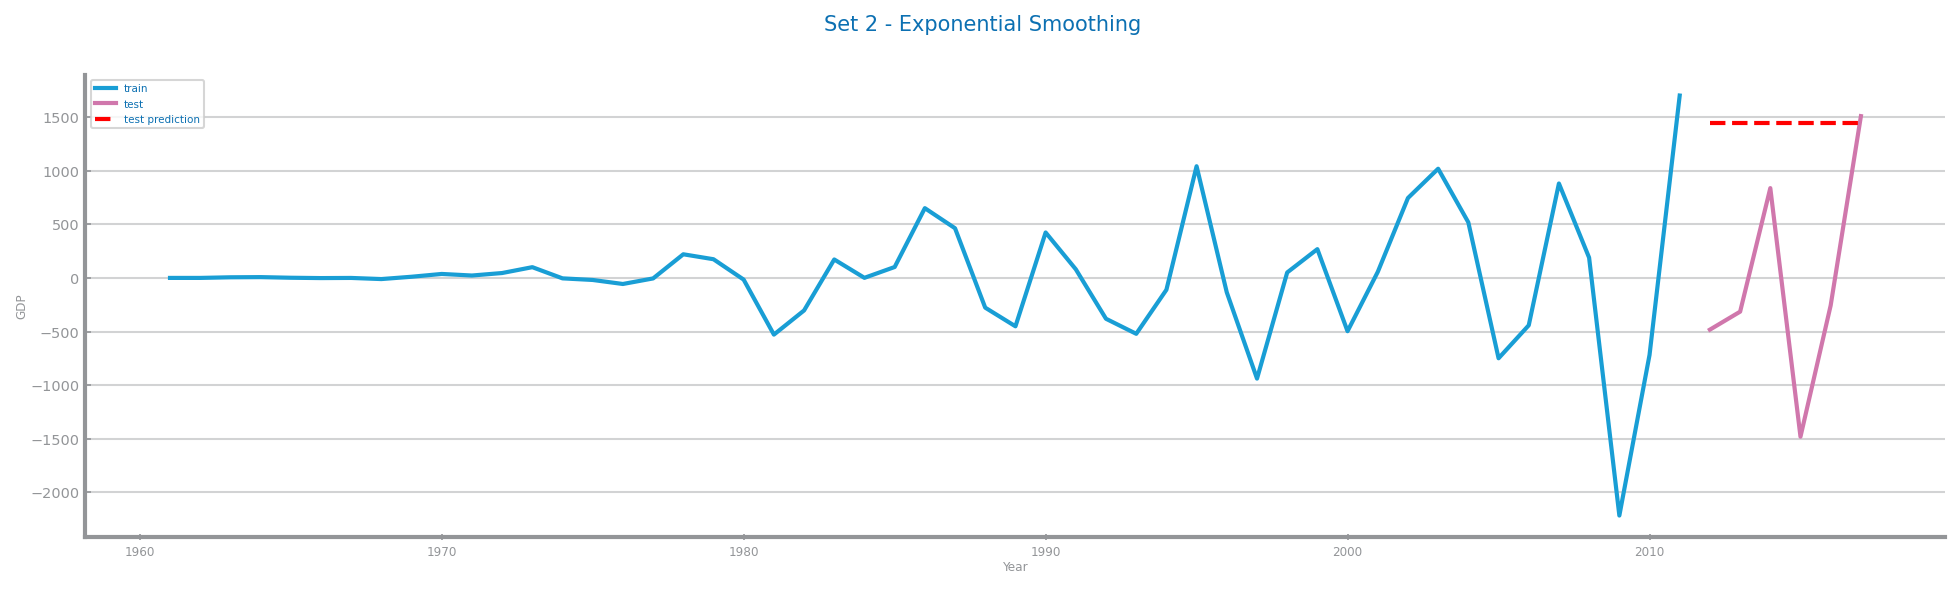

In [32]:
from dslabs_functions import plot_forecasting_series

plot_forecasting_series(
    train,
    test,
    prd_tst,
    title=f"{file_tag} - Exponential Smoothing ",
    xlabel=timecol,
    ylabel=target,
)
savefig(f"/home/mina/Documents/portugal/dataScience/Data_science_project/MODELS’ EVALUATION/images_exponential/{file_tag}_exponential_smoothing_{measure}_forecast.png")